#Univariate Analysis

In [ ]:
#mounting google drive to colab note book
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import Requried Libraries

In [ ]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# seeting the path
path='/content/drive/MyDrive/Capstone/farm_ids'

#Reading the data

In [ ]:
# create empty list
list_of_names=[] 
#The glob.glob function is used to search for all files in the directory specified by path 
#that match the pattern *.csv
for i in glob.glob(path+'/'+"*.csv"):
  list_of_names.append(i) 

In [ ]:
 #create empty list
dataframes_list = []
#For each iteration of the loop, the line temp_df=pd.read_csv(list_of_names[i]) reads the .csv file 
#at the index i of the list list_of_names into a pandas dataframe 
for i in range (len(list_of_names)):
  temp_df=pd.read_csv(list_of_names[i])
  dataframes_list.append(temp_df)

In [ ]:
for i in dataframes_list:
  print(i.shape)

(8783, 13)
(8783, 13)
(8783, 13)
(8783, 13)
(8783, 13)
(8783, 13)
(8783, 13)
(8783, 13)
(8783, 13)
(8783, 13)


In [ ]:
df=dataframes_list[0] # 0th index values are taking in data1
df

,date,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 01:00:00,fid_110884,ing_w,0.000,690.455096,Obery Farms,location 7369,24.4,70.0,21.1,1020.2,-1.0,1.5
1,2016-01-01 02:00:00,fid_110884,ing_w,0.000,690.455096,Obery Farms,location 7369,22.8,0.0,21.1,1020.2,0.0,0.0
2,2016-01-01 03:00:00,fid_110884,ing_w,0.000,690.455096,Obery Farms,location 7369,21.1,0.0,20.6,1020.1,0.0,0.0
3,2016-01-01 04:00:00,fid_110884,ing_w,0.000,690.455096,Obery Farms,location 7369,20.0,250.0,20.0,1020.0,-1.0,2.6
4,2016-01-01 05:00:00,fid_110884,ing_w,0.000,690.455096,Obery Farms,location 7369,19.4,0.0,19.4,1019.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8778,2016-12-31 19:00:00,fid_110884,ing_w,232.071,690.455096,Obery Farms,location 7369,22.8,140.0,10.0,1021.7,0.0,5.7
8779,2016-12-31 20:00:00,fid_110884,ing_w,189.069,690.455096,Obery Farms,location 7369,23.3,170.0,8.9,1021.0,0.0,4.1
8780,2016-12-31 21:00:00,fid_110884,ing_w,169.958,690.455096,Obery Farms,location 7369,23.3,150.0,10.0,1021.1,0.0,4.1
8781,2016-12-31 22:00:00,fid_110884,ing_w,169.958,690.455096,Obery Farms,location 7369,22.8,160.0,10.0,1021.1,0.0,3.1


#Data Types

In [ ]:
df.dtypes

date                      object
farm_id                   object
ingredient_type           object
yield                    float64
farm_area                float64
farming_company           object
deidentified_location     object
temp_obs                 float64
wind_direction           float64
dew_temp                 float64
pressure_sea_level       float64
precipitation            float64
wind_speed               float64
dtype: object

In [ ]:
#creating a data frame for date and yield for univariate analasis
data=pd.DataFrame(df[['date','yield']])
data

,date,yield
0,2016-01-01 01:00:00,0.000
1,2016-01-01 02:00:00,0.000
2,2016-01-01 03:00:00,0.000
3,2016-01-01 04:00:00,0.000
4,2016-01-01 05:00:00,0.000
...,...,...
8778,2016-12-31 19:00:00,232.071
8779,2016-12-31 20:00:00,189.069
8780,2016-12-31 21:00:00,169.958
8781,2016-12-31 22:00:00,169.958


In [ ]:
#onverting date columns as index
data.set_index('date',inplace=True)
data

,yield
date,
2016-01-01 01:00:00,0.000
2016-01-01 02:00:00,0.000
2016-01-01 03:00:00,0.000
2016-01-01 04:00:00,0.000
2016-01-01 05:00:00,0.000
...,...
2016-12-31 19:00:00,232.071
2016-12-31 20:00:00,189.069
2016-12-31 21:00:00,169.958


In [ ]:
# creating a new index for entire one year on hour basis
new_index = pd.date_range(start='2016-01-01 00:00:000', end='2016-12-31 23:00:000', freq='H').strftime('%Y-%m-%d %H:%M:%S')
new_index

Index(['2016-01-01 00:00:00', '2016-01-01 01:00:00', '2016-01-01 02:00:00',
       '2016-01-01 03:00:00', '2016-01-01 04:00:00', '2016-01-01 05:00:00',
       '2016-01-01 06:00:00', '2016-01-01 07:00:00', '2016-01-01 08:00:00',
       '2016-01-01 09:00:00',
       ...
       '2016-12-31 14:00:00', '2016-12-31 15:00:00', '2016-12-31 16:00:00',
       '2016-12-31 17:00:00', '2016-12-31 18:00:00', '2016-12-31 19:00:00',
       '2016-12-31 20:00:00', '2016-12-31 21:00:00', '2016-12-31 22:00:00',
       '2016-12-31 23:00:00'],
      dtype='object', length=8784)

In [ ]:
# assigning new index to our data
data1=data.reindex(new_index)

In [ ]:
# checking null values after changing index
data1.isnull().sum()

yield    1
dtype: int64

In [ ]:
# filling the null values with 0s
data1.fillna(0,inplace=True)
data1.isnull().sum()

yield    0
dtype: int64

In [ ]:
data1.shape

(8784, 1)

#Train_test_split

In [ ]:
# spliting the data into train and test,in train we are taking data upto '2016-12-15 23:00:00.00' her and in test '2016-12-15 23:00:00.00'after this values
train=data1.loc[data1.index<'2016-12-15 23:00:00.00']
test=data1.loc[data1.index>='2016-12-15 23:00:00.00']

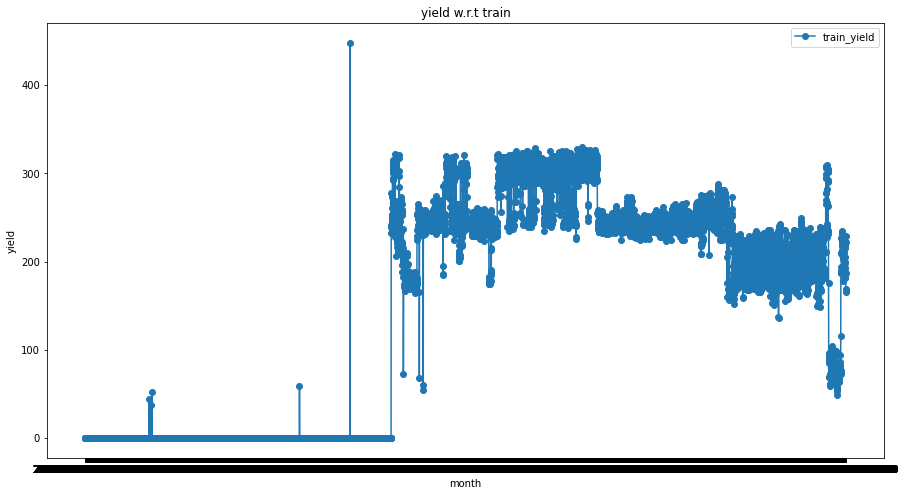

In [ ]:
# visualizating the train data
plt.figure(figsize=(15,8))
plt.plot(train.index,train['yield'], '-o')
plt.title('yield w.r.t train')
plt.ylabel('yield')
plt.xlabel('month')
plt.legend(['train_yield'],loc='Best')
plt.show()

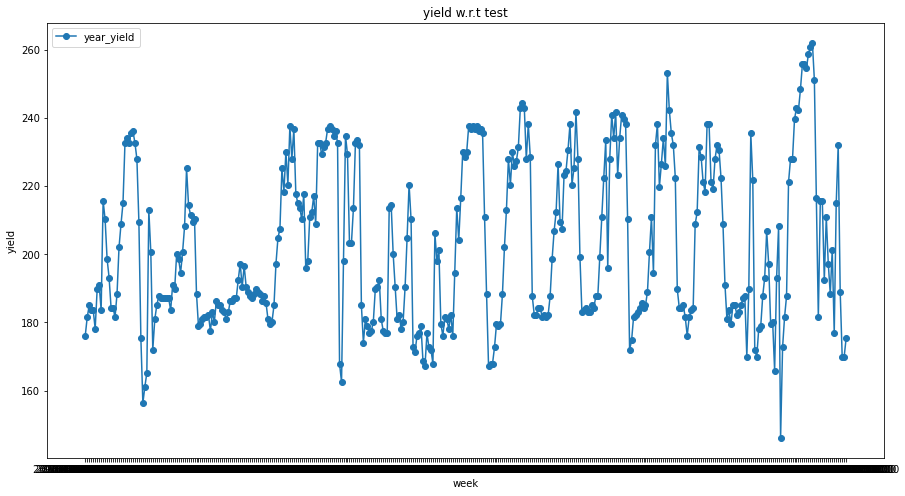

In [ ]:
# visualizating the test data
plt.figure(figsize=(15,8))
plt.plot(test.index,test['yield'], '-o')
plt.title('yield w.r.t test')
plt.ylabel('yield')
plt.xlabel('week')
plt.legend(['year_yield'],loc='Best')
plt.show()

#ACF and PACF

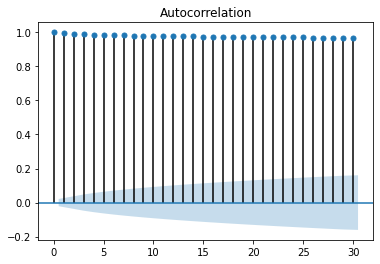

In [ ]:
# plot acf
plot_acf(train['yield'], lags=30, alpha=0.05)
plt.show()

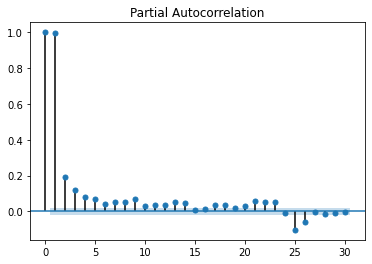

In [ ]:
# plot acf
plot_pacf(train['yield'], lags=30, alpha=0.05)
plt.show()

#Statistical Tests

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(yld):
    result=adfuller(yld)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(train['yield'])

ADF Test Statistic : -1.9100000064480773
p-value : 0.3273715145104481
#Lags Used : 25
Number of Observations Used : 8374
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
train['yield'].diff(1)

2016-01-01 00:00:00       NaN
2016-01-01 01:00:00     0.000
2016-01-01 02:00:00     0.000
2016-01-01 03:00:00     0.000
2016-01-01 04:00:00     0.000
                        ...  
2016-12-15 19:00:00    -6.825
2016-12-15 20:00:00   -35.493
2016-12-15 21:00:00   -20.477
2016-12-15 22:00:00    -0.683
2016-12-15 23:00:00     3.413
Name: yield, Length: 8400, dtype: float64

In [ ]:
adfuller_test(train['yield'].diff(1)[1:]) # except 1st row

ADF Test Statistic : -21.680999989875946
p-value : 0.0
#Lags Used : 24
Number of Observations Used : 8374
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


###ACF and PACF plots for 1 order differencing

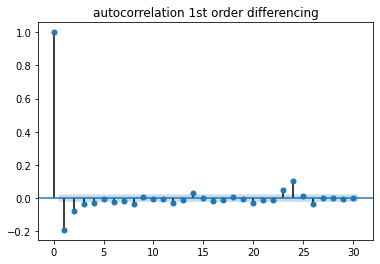

In [ ]:
# plot acf
plot_acf(train['yield'].diff(1).dropna(), lags=30, title='autocorrelation 1st order differencing')
plt.show()

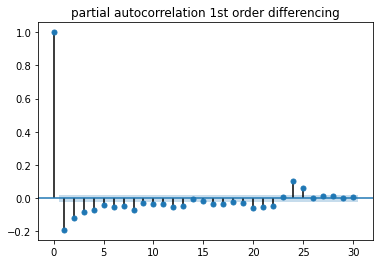

In [ ]:
plot_pacf(train['yield'].diff(1).dropna(), lags=30, alpha=0.05, title='partial autocorrelation 1st order differencing')
plt.show()

#ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model_arima=ARIMA(train['yield'].values,order=(2,1,2))
model_arima_fit=model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 8400
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -33068.924
Date:                Thu, 23 Feb 2023   AIC                          66147.847
Time:                        07:08:44   BIC                          66183.026
Sample:                             0   HQIC                         66159.859
                               - 8400                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3236      0.098     -3.312      0.001      -0.515      -0.132
ar.L2          0.6449      0.059     10.847      0.000       0.528       0.761
ma.L1          0.1019      0.098      1.043      0.2

In [ ]:
model_arima_forecast = model_arima_fit.forecast(steps = len(test))
print(model_arima_forecast[:15]) # first 15 predictions on test data

[174.41549219 177.70997714 179.95890451 181.35571772 182.35400546
 182.93174582 183.38856711 183.61331825 183.83518344 183.90832888
 184.02773414 184.03626731 184.11050634 184.09198774 184.14585378]


#Evaluation of ARIMA

In [ ]:
# defining the funtion for error metrics
from sklearn import metrics
def error_metrics(train_act,train_pred,test_act,test_pred):
        print('*** Error metrics Train data ***')
        print('RMSE Train:', np.sqrt(metrics.mean_squared_error(train_act, train_pred)))


        print('***\n Error metrics Test Data ***')
        print('RMSE Train:', np.sqrt(metrics.mean_squared_error(test_act,test_pred)))


In [ ]:
error_metrics(train['yield'],model_arima_fit.forecast(steps=len(train)),test['yield'],model_arima_fit.forecast(steps=len(test)))

*** Error metrics Train data ***
RMSE Train: 130.30870403685373
***
 Error metrics Test Data ***
RMSE Train: 29.946755591695606


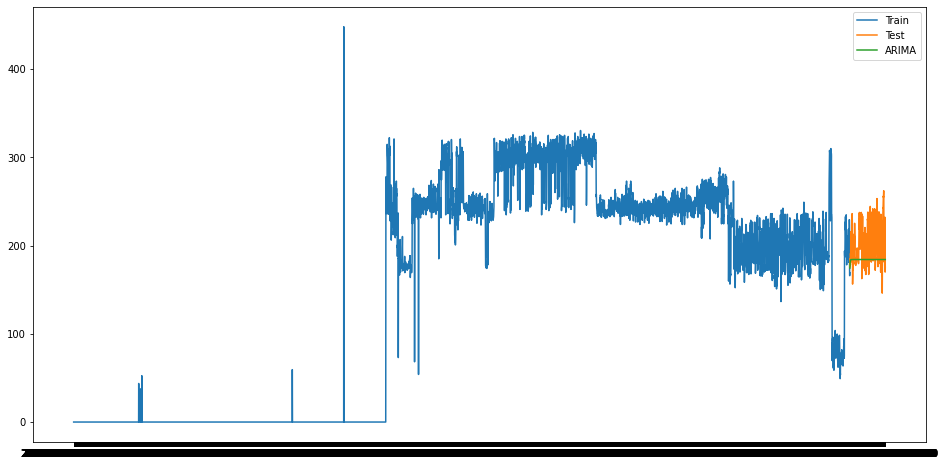

In [ ]:
# model_arima_forecast['ARIMA'] = model_arima_forecast
test['ARIMA']=model_arima_forecast
plt.figure(figsize=(16,8))
plt.plot( train['yield'], label='Train')
plt.plot(test['yield'], label='Test')
plt.plot(test['ARIMA'], label='ARIMA')
plt.legend(loc='best')
plt.show()

#AUTO_ARIMA

In [ ]:
# istalling pmdarima for auto_arima
! pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from pmdarima.arima import auto_arima

In [ ]:
# Fit auto_arima model using the 1-dimensional train array
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

In [ ]:
future_forecast = model.predict(n_periods=len(test))
future_forecast[:10] # first 10 predictions of auto arima model

In [ ]:
test['AUTO_ARIMA']=future_forecast
plt.figure(figsize=(16,8))
plt.plot( train['yield'], label='Train')
plt.plot(test['yield'], label='Test')
plt.plot(test['AUTO_ARIMA'], label='AUTO_ARIMA')
plt.legend(loc='best')
plt.show()

###Evaluating auto_arima

In [ ]:
error_metrics(train['yield'],model.predict(steps=len(train)),test['yield'],model.predict(steps=len(test)))